<h1>Pet Reptiles Classification</h1>

The dataset collected for this project consist of 2000 color images of pet reptiles from 5 classes (species): Bearded Dragons, Blue-Tongued Skinks, Leopard Geckos, Panther Chameleons and Veiled Chameleons. There are 400 images for each class. The dataset for this project was web scraped from Google Images.The aim of this project is to build neural network model that detects which reptile species is on the image.

Necessary imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Activation, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adagrad, Adadelta, Adam 
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 

<h3> Preparing the dataset</h3>

Downloading and extracting the dataset from .zip file

In [ ]:
# https://drive.google.com/file/d/1BytOZlVAWCkGz4ABYL9yE-Gjh2rLBx1p/view?usp=sharing
# 1BytOZlVAWCkGz4ABYL9yE-Gjh2rLBx1p

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BytOZlVAWCkGz4ABYL9yE-Gjh2rLBx1p' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1BytOZlVAWCkGz4ABYL9yE-Gjh2rLBx1p" -O 'lizards_dataset.zip' && rm -rf /tmp/cookies.txt

--2022-02-20 03:21:01--  https://docs.google.com/uc?export=download&confirm=t&id=1BytOZlVAWCkGz4ABYL9yE-Gjh2rLBx1p
Resolving docs.google.com (docs.google.com)... 142.250.103.100, 142.250.103.139, 142.250.103.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.103.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/62tjgde85t33l54n1fhrdu4flb57fntm/1645327200000/13054450589790615526/*/1BytOZlVAWCkGz4ABYL9yE-Gjh2rLBx1p?e=download [following]
--2022-02-20 03:21:01--  https://doc-10-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/62tjgde85t33l54n1fhrdu4flb57fntm/1645327200000/13054450589790615526/*/1BytOZlVAWCkGz4ABYL9yE-Gjh2rLBx1p?e=download
Resolving doc-10-ac-docs.googleusercontent.com (doc-10-ac-docs.googleusercontent.com)... 74.125.70.132, 2607:f8b0:4001:c02::84
Connecting to doc-10-ac-docs.googleusercontent.com (doc-10

In [ ]:
with zipfile.ZipFile('lizards_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

Loading and resizing images and labeling the data.<br><br>
The class labels and their associated reptile species are as following:<br>
0 - Bearded Dragons<br>
1 - Blue-Tongued Skinks<br>
2 - Leopard Geckos<br>
3 - Panther Chameleons<br>
4 - Veiled Chameleons


In [ ]:
dataset_folder = '/content/lizards_dataset/'
folder_bd = dataset_folder + 'bearded_dragons/'
folder_bts = dataset_folder + 'blue_tongued_skinks/'
folder_lg = dataset_folder + 'leopard_geckos/'
folder_pc = dataset_folder + 'panther_chameleons/'
folder_vc = dataset_folder + 'veiled_chameleons/'

filenames_bd = os.listdir(folder_bd)
filenames_bts = os.listdir(folder_bts)
filenames_lg = os.listdir(folder_lg)
filenames_pc = os.listdir(folder_pc)
filenames_vc = os.listdir(folder_vc)

# resizing images to specified width and height
width = 50
height = 50

# bearded_dragons
x_bd = np.array([np.array(cv2.cvtColor(cv2.resize(cv2.imread(folder_bd+filename), (width, height), interpolation=cv2.INTER_AREA), cv2.COLOR_BGR2RGB)) for filename in filenames_bd])
y_bd = np.array([0] * x_bd.shape[0])
# blue_tongued_skinks
x_bts = np.array([np.array(cv2.cvtColor(cv2.resize(cv2.imread(folder_bts+filename), (width, height), interpolation=cv2.INTER_AREA), cv2.COLOR_BGR2RGB)) for filename in filenames_bts])
y_bts = np.array([1] * x_bts.shape[0])
# leopard_geckos
x_lg = np.array([np.array(cv2.cvtColor(cv2.resize(cv2.imread(folder_lg+filename), (width, height), interpolation=cv2.INTER_AREA), cv2.COLOR_BGR2RGB)) for filename in filenames_lg])
y_lg = np.array([2] * x_lg.shape[0])
# panther_chameleons
x_pc = np.array([np.array(cv2.cvtColor(cv2.resize(cv2.imread(folder_pc+filename), (width, height), interpolation=cv2.INTER_AREA), cv2.COLOR_BGR2RGB)) for filename in filenames_pc])
y_pc = np.array([3] * x_pc.shape[0])
# veiled_chameleons
x_vc = np.array([np.array(cv2.cvtColor(cv2.resize(cv2.imread(folder_vc+filename), (width, height), interpolation=cv2.INTER_AREA), cv2.COLOR_BGR2RGB)) for filename in filenames_vc])
y_vc = np.array([4] * x_vc.shape[0])

<h3>Example images from each class:</h3>


<h5>Bearded Dragons:</h5>

bearded_dragons - shape: (400, 50, 50, 3)



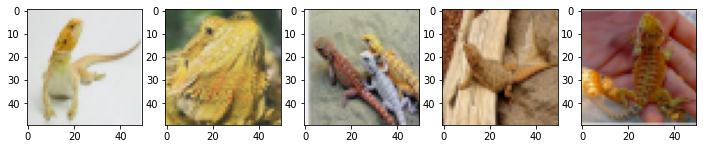

In [ ]:
plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_bd[i])

print(f'bearded_dragons - shape: {x_bd.shape}\n')

<h5>Blue-Tongued Skinks:</h5>

blue_tongued_skinks - shape: (400, 50, 50, 3)



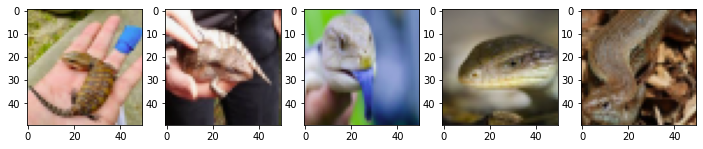

In [ ]:
plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_bts[i])

print(f'blue_tongued_skinks - shape: {x_bts.shape}\n')

<h5>Leopard Geckos:</h5>

leopard_geckos - shape: (400, 50, 50, 3)



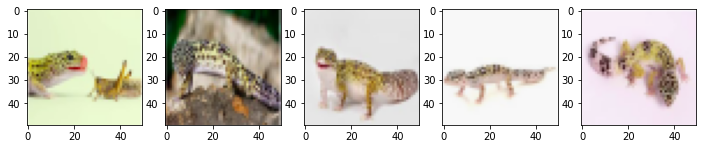

In [ ]:
plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_lg[i])

print(f'leopard_geckos - shape: {x_lg.shape}\n')

<h5>Panther Chameleons:</h5>

panther_chameleons - shape: (400, 50, 50, 3)



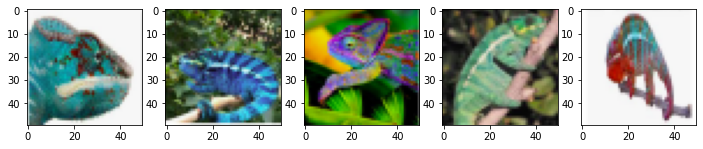

In [ ]:
plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_pc[i])

print(f'panther_chameleons - shape: {x_pc.shape}\n')

<h5>Veiled Chameleons:</h5>

veiled_chameleons - shape: (400, 50, 50, 3)



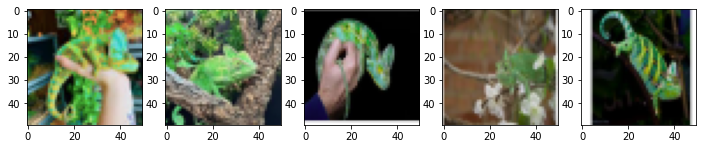

In [ ]:
plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_vc[i])

print(f'veiled_chameleons - shape: {x_vc.shape}\n')

Normalization of samples and one-hot encoding of labels

In [ ]:
x = np.concatenate((x_bd, x_bts, x_lg, x_pc, x_vc),axis=0)
y = np.concatenate((y_bd, y_bts, y_lg, y_pc, y_vc),axis=0)

print(f'x - shape: {x.shape}, min value: {np.min(x)}, max value: {np.max(x)}\n')

# normalization 
x = x.astype('float32')
x /= 255

print(f'x normalized - shape: {x.shape}, min value: {np.min(x)}, max value: {np.max(x)}\n')

# one-hot encoding
num_classes = 5
y = keras.utils.to_categorical(y, num_classes)

x - shape: (2000, 50, 50, 3), min value: 0, max value: 255

x normalized - shape: (2000, 50, 50, 3), min value: 0.0, max value: 1.0



Splitting dataset into train, validation and test sets

In [ ]:
x, y = shuffle(x, y, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(f'x_train - shape: {x_train.shape}\n')
print(f'x_val - shape: {x_val.shape}\n')
print(f'x_test - shape: {x_test.shape}\n')

x_train - shape: (1620, 50, 50, 3)

x_val - shape: (180, 50, 50, 3)

x_test - shape: (200, 50, 50, 3)



Data augmentation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(x_train)

<h3>Creating CNN model with Keras<h3>

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(50, 50, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3,3), activation='relu', padding="same"))
model.add(Conv2D(32, (3,3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation='relu', padding="same"))
model.add(Conv2D(64, (3,3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), activation='relu', padding="same"))
model.add(Conv2D(256, (3,3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_249 (Conv2D)         (None, 50, 50, 32)        896       
                                                                 
 conv2d_250 (Conv2D)         (None, 50, 50, 32)        9248      
                                                                 
 conv2d_251 (Conv2D)         (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 25, 25, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_127 (Dropout)       (None, 25, 25, 32)        0         
                                                                 
 conv2d_252 (Conv2D)         (None, 25, 25, 64)        18496     
                                                     

<h3>Training</h3>

In [ ]:
epochs = 300
batch_size = 128

In [ ]:
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001)
]

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['categorical_accuracy'])

# Train model

# history = model.fit(x_train, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=(x_val, y_val),
#                     callbacks = keras_callbacks)

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks = keras_callbacks)

Epoch 1/300
13/13 [==============================] - 4s 200ms/step - loss: 1.6094 - categorical_accuracy: 0.2056 - val_loss: 1.6099 - val_categorical_accuracy: 0.1889
Epoch 2/300
13/13 [==============================] - 2s 180ms/step - loss: 1.6094 - categorical_accuracy: 0.1907 - val_loss: 1.6106 - val_categorical_accuracy: 0.1889
Epoch 3/300
13/13 [==============================] - 2s 171ms/step - loss: 1.6079 - categorical_accuracy: 0.2025 - val_loss: 1.6106 - val_categorical_accuracy: 0.1611
Epoch 4/300
13/13 [==============================] - 2s 176ms/step - loss: 1.6080 - categorical_accuracy: 0.1963 - val_loss: 1.6095 - val_categorical_accuracy: 0.2333
Epoch 5/300
13/13 [==============================] - 2s 177ms/step - loss: 1.6051 - categorical_accuracy: 0.2068 - val_loss: 1.6085 - val_categorical_accuracy: 0.1833
Epoch 6/300
13/13 [==============================] - 2s 171ms/step - loss: 1.5955 - categorical_accuracy: 0.2037 - val_loss: 1.6030 - val_categorical_accuracy: 0.216

<h3>Training history</h3>

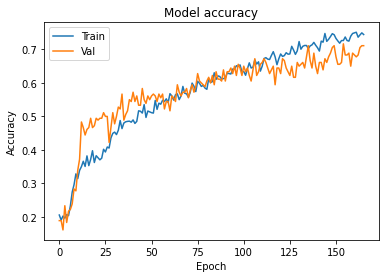

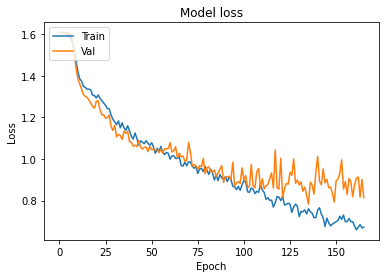

In [ ]:
# visualize training history 
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

<h3>Evaluation on test set</h3>

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('model.h5')

Test loss: 0.7903314828872681
Test accuracy: 0.7149999737739563


Even though the dataset was small, overfitting was reduced with the use of data augmentation and dropout layers. Best CNN model built in this project managed to achieve approximately 71% categorical accuracy on test data, which seems to be quite a good result considering small size of dataset and its difficulty (images of some reptiles from different classess look very similiar, for example some panther chameleons are green, which makes them look very similiar to veiled chameleons). <br>
Increasing the size of the dataset should increase the accuracy of prediction in the future.